# POLI 175 - Lecture 20

## Tree-based models II

# Tree-based methods

## Tree-based methods

- Tree-based methods consist of segmenting the predictors' space into many regions

- Then, use these regions to predict the target variable.
    + We use heuristics here, such as the variable's mean in the region.
    
- This approach is called the `decision tree method`

- It, by itself, is terrible. But then many methods improve the efficiency considerably
    + We are going to look at some of these approaches today.

In [1]:
## Loading the relevant packages
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

# Look at our friend here to help with GAM
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

# Loading scikit learn relevant packages (note our new friends!)
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names, mean_squared_error, r2_score, mean_squared_error, roc_auc_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import VotingClassifier, BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier

## Decision Trees

- Decision trees for classification and regression tend to do poorly.

- This is because they are sensitive to the variation in the data.

- And this is something that you cannot change by rescaling the data:
    - Trees are **not** sensitive to the data scale.

## Decision Trees

- But here is the thing: We can combine many poor models and create a great one!

- We can combine many great models and create an even better one, but sometimes it is hard to improve on something already great.

- This technique is called **ensemble**!

## Ensemble

- Let's go back to the Civil War prediction dataset.

- Remember that in PS 02, we tried (but failed) to build decent models to estimate it.

- We now revisit the problem.

In [2]:
# Load data
dat = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/mshk-pa-2017/SambanisImp.csv')

## Target
target = "warstds"

## Predictors
predictors = ["ager", "agexp", "anoc", "army85", "autch98", "auto4","autonomy", "avgnabo", 
              "centpol3", "coldwar", "decade1", "decade2","decade3", "decade4", "dem", 
              "dem4", "demch98", "dlang", "drel", "durable", "ef", "ef2", "ehet", "elfo", 
              "elfo2", "etdo4590", "expgdp", "exrec", "fedpol3", "fuelexp", "gdpgrowth", 
              "geo1", "geo2", "geo34", "geo57", "geo69", "geo8", "illiteracy", "incumb", 
              "infant", "inst", "inst3", "life", "lmtnest", "ln_gdpen", "lpopns", "major", 
              "manuexp", "milper", "mirps0", "mirps1", "mirps2", "mirps3", "nat_war", 
              "ncontig", "nmgdp", "nmdp4_alt", "numlang", "nwstate", "oil", "p4mchg", 
              "parcomp", "parreg", "part", "partfree", "plural", "plurrel", "pol4", "pol4m", 
              "pol4sq", "polch98", "polcomp", "popdense", "presi", "pri", "proxregc", 
              "ptime", "reg", "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", 
              "sxpnew", "sxpsq", "tnatwar", "trade", "warhist", "xconst"]

dat = dat[[target] + predictors]
y = dat[target]
X = dat[predictors]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 12345)

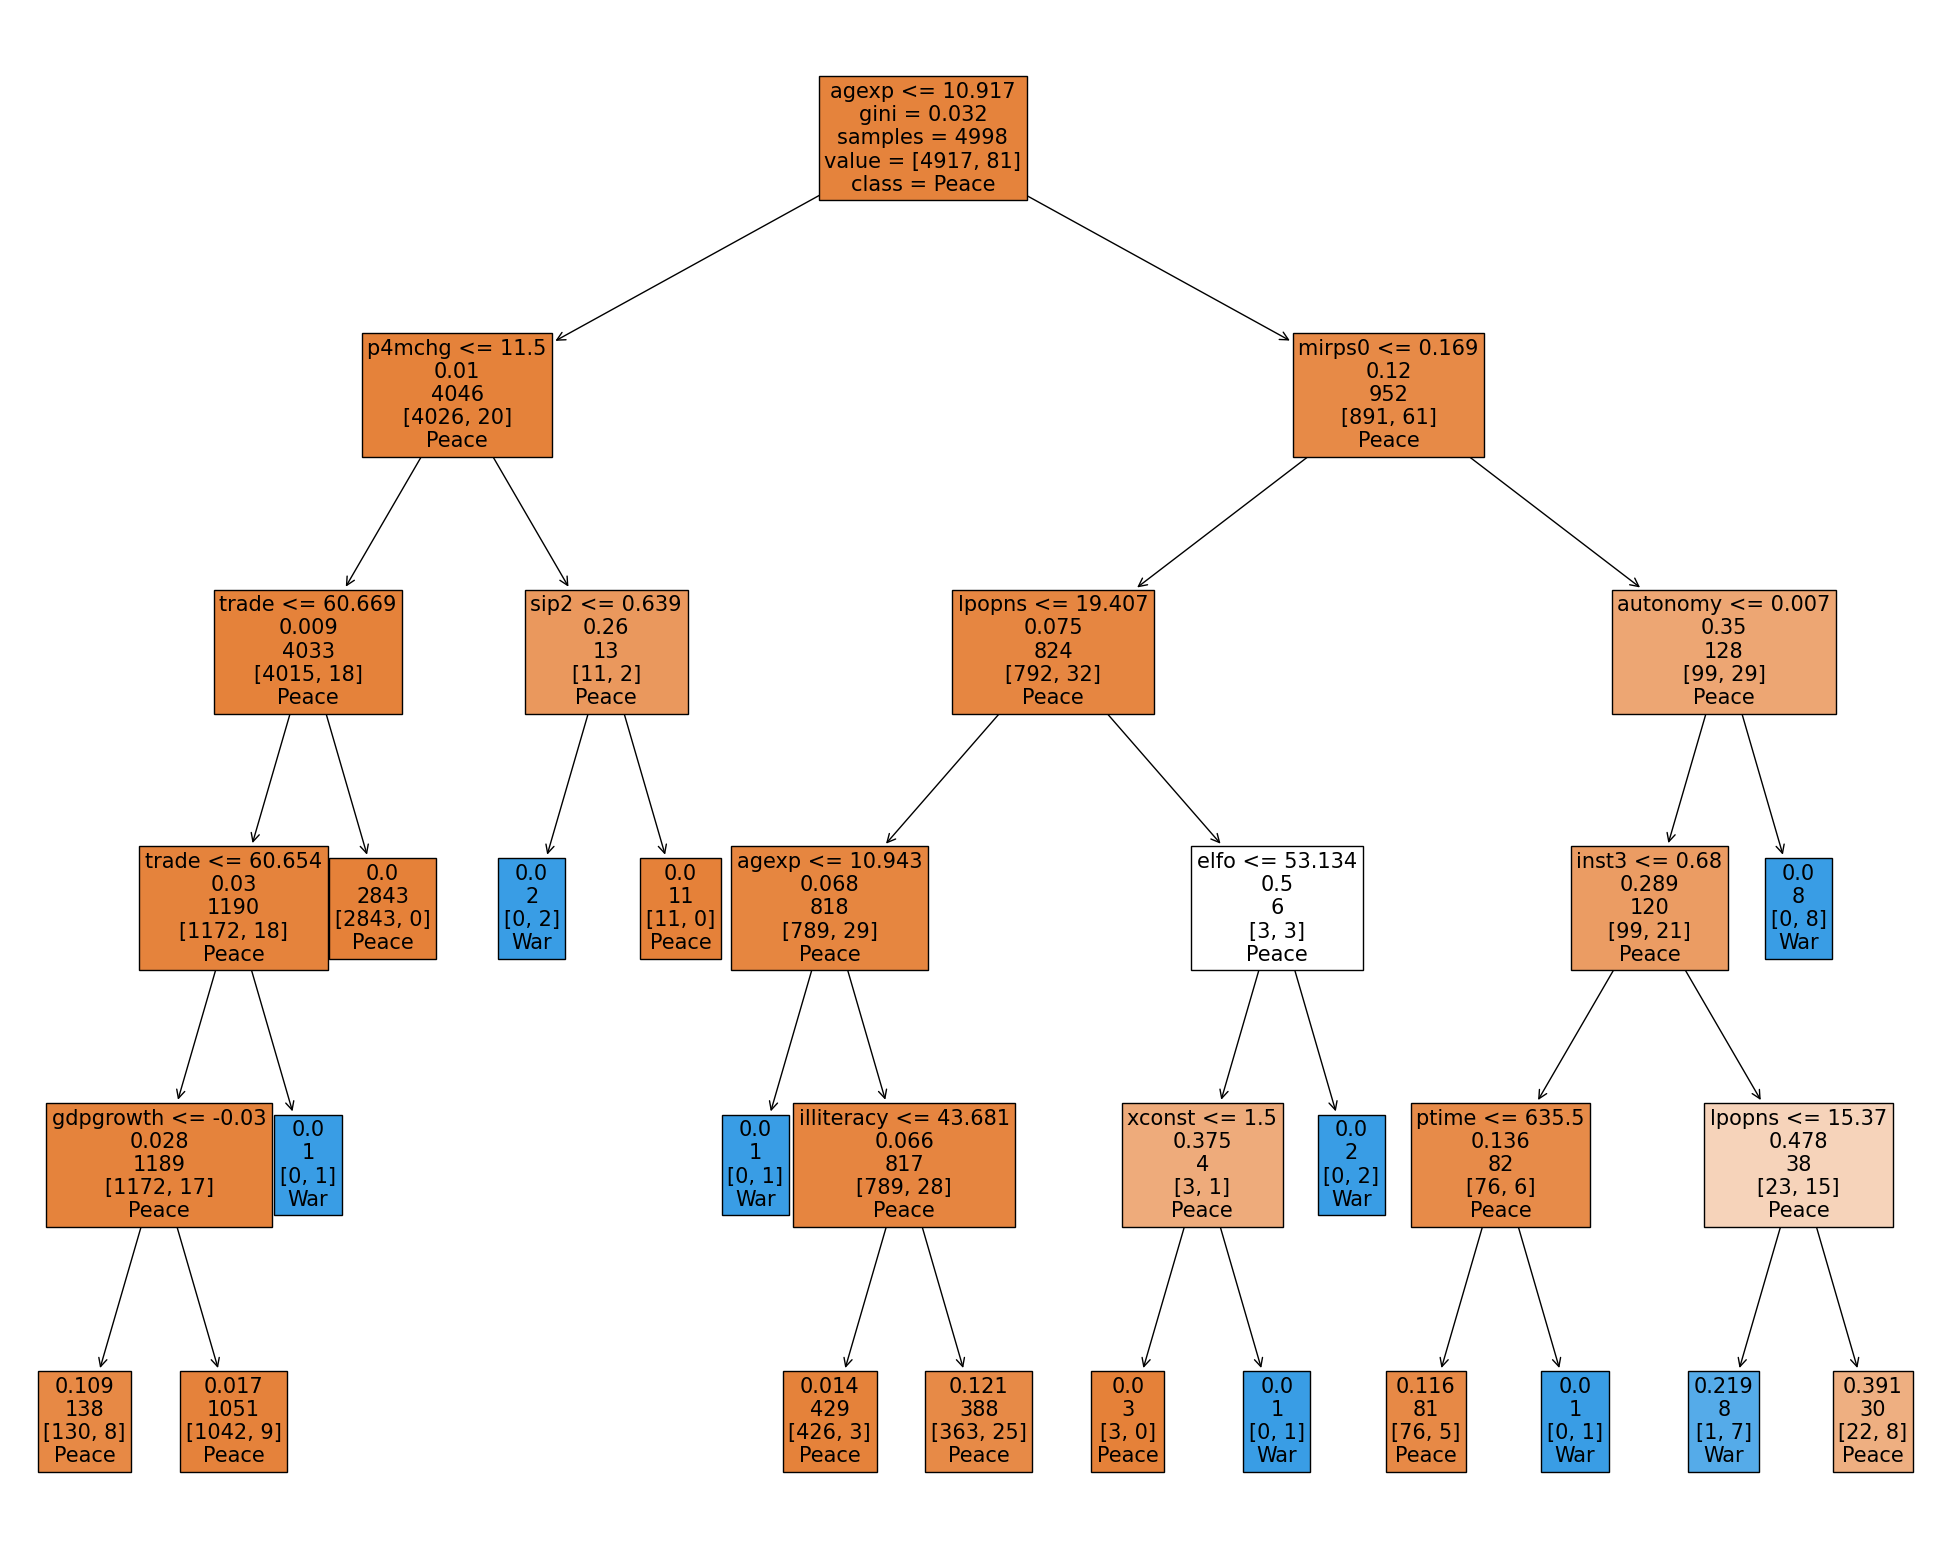

In [3]:
## Decision Tree
dt = DecisionTreeClassifier(max_depth = 5)

# Fit dt to the training set
dt.fit(X_train, y_train)

# See Decision Tree (does not look great...)
fig = plt.figure(figsize = (25,20))
plot_tree(dt, fontsize = 15, feature_names = list(X.columns), 
          max_depth = 5, class_names = ['Peace', 'War'],
         label = 'root', filled = True)
plt.show()

In [4]:
## Seeing it in text (not great either)
print(export_text(dt, feature_names = list(X.columns)))

|--- agexp <= 10.92
|   |--- p4mchg <= 11.50
|   |   |--- trade <= 60.67
|   |   |   |--- trade <= 60.65
|   |   |   |   |--- gdpgrowth <= -0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- gdpgrowth >  -0.03
|   |   |   |   |   |--- class: 0
|   |   |   |--- trade >  60.65
|   |   |   |   |--- class: 1
|   |   |--- trade >  60.67
|   |   |   |--- class: 0
|   |--- p4mchg >  11.50
|   |   |--- sip2 <= 0.64
|   |   |   |--- class: 1
|   |   |--- sip2 >  0.64
|   |   |   |--- class: 0
|--- agexp >  10.92
|   |--- mirps0 <= 0.17
|   |   |--- lpopns <= 19.41
|   |   |   |--- agexp <= 10.94
|   |   |   |   |--- class: 1
|   |   |   |--- agexp >  10.94
|   |   |   |   |--- illiteracy <= 43.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- illiteracy >  43.68
|   |   |   |   |   |--- class: 0
|   |   |--- lpopns >  19.41
|   |   |   |--- elfo <= 53.13
|   |   |   |   |--- xconst <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- xconst >  1.50
|   |   |   |   |  

[[2098   33]
 [   9    2]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2131
           1       0.06      0.18      0.09        11

    accuracy                           0.98      2142
   macro avg       0.53      0.58      0.54      2142
weighted avg       0.99      0.98      0.99      2142



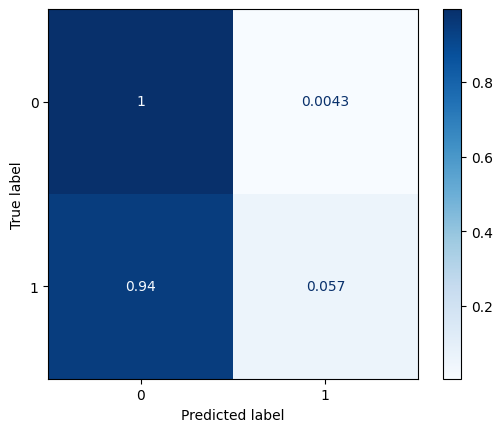

In [5]:
# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test,
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Compute test set accuracy  
accuracy_score(y_pred, y_test)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test,
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

## Ensemble

- Check an example of an ensemble using three classifiers:

In [ ]:
## Classifiers
logreg = LogisticRegression(max_iter = 10000)
lda = LinearDiscriminantAnalysis()
dt = DecisionTreeClassifier(max_depth = 10)
classifiers = [('Logistic Regression', logreg), ('LDA', lda), ('Classification Tree', dt)]

In [ ]:
# Each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    print('{} accuracy = {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

In [ ]:
# Their Ensemble
vc = VotingClassifier(estimators = classifiers)     
vc.fit(X_train, y_train)   
y_pred = vc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(vc, X_test, y_test,
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

## Detour: Bootstrap

- To understand some ensemble techniques, we must first learn what a bootstrap is.

- [**Bootstrap**](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)): Technique to fit models empirically, without deriving theoretically the parameters of interest.
    + We use it a lot to find standard errors and run things like [*exact tests*](https://en.wikipedia.org/wiki/Exact_test) and [randomization inference](https://dimewiki.worldbank.org/Randomization_Inference).

- Very empirical!

## Detour: Bootstrap

**Algorithm:** Start with the number of repetitions, N. For each $1, 2, \cdots, N$ step:

1. Draw a sample of the dataset [**with replacement**](https://en.wikipedia.org/wiki/Resampling_(statistics)) that has the same size of the dataset.

2. Fit the model (e.g., a regression) in the randomly drawn dataset.

3. Save the coefficient of interest.

In the end, take the mean of the coefficient as the `bootstrapped` coefficient and the standard deviation as the standard error.

## Bagging

- Bagging stands for Bootstrap Aggregation.

- The idea is to fit each tree on a bootstrapped dataset, then take the average of all trees.

- Each tree performs poorly. However, the average performance of all of them is better!

$$ \hat{f}_{bag}(x) \ = \ \dfrac{1}{B}\sum_{b = 1}^B \hat{f}^b(x) $$

## Bagging

- We let trees grow wildly: no pruning!
    + Averaging them out is what reduces the variance!
    
- For continuous variables, we take averages as the predicted value.

- How about classification problems?
    + Majority vote for all trees!

## Bagging

![bag1](../img/bag1.png)

## Bagging

- This straightforward technique decreases the variance of a tree significantly.

- But how to interpret what the average of the trees means?
    - Well, we lose in terms of interpretation...

- One positive thing is that we can still find the **importance of each variable for the *bagging***

## Bagging

![bag2](../img/bag2.png)

## Bagging

- Cross-validation here can be improved by using something called **out-of-bag** errors:
    + The bootstrap process usually leaves out 1/3 of the sample.
    + We can take advantage of this left-out (or *out-of-bag* sample), to estimate our models.

- And we fit RMSE for continuous or accuracy for discrete.

## Bagging

In [ ]:
## Bagging (discrete target)
dt = DecisionTreeClassifier()
bc = BaggingClassifier(estimator = dt, n_estimators = 50)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
print('Test set accuracy of bc: {:.2f}'.format(accuracy_score(y_test, y_pred))) 

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
## Bagging with OOB
bc = BaggingClassifier(estimator = dt, 
            n_estimators = 50,
            oob_score = True)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [ ]:
## Countries Dataset
countr = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/countrdat.csv')
y2 = countr['wdi_wip']
X2 = countr[['wdi_expedu', 'pwt_pop', 'mad_gdppc']]
X2 = X2.join(pd.get_dummies(countr.ccodealp, drop_first = True, prefix = 'country'))
X2 = X2.join(pd.get_dummies(countr.year, drop_first = True, prefix = 'year'))
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 12345)
X2.head()

In [ ]:
## Bagging (continuous target)
dt = DecisionTreeRegressor()
bc = BaggingRegressor(estimator = dt, n_estimators = 50)
bc.fit(X2_train, y2_train)
y2_pred = bc.predict(X2_test)

# Lin reg (comparison)
lin = LinearRegression()
lin.fit(X2_train, y2_train)
y2_pred_lin = lin.predict(X2_test)
linreg_rmse = mean_squared_error(y2_test, y2_pred_lin) ** 0.5
bag_rmse = mean_squared_error(y2_test, y2_pred) ** 0.5

In [ ]:
# Comparing
print('Test set RMSE of Linear Regression is: {:.3f}'.format(linreg_rmse))
print('Test set RMSE of Bagging is: {:.3f}'.format(bag_rmse))

## Random Forests

- It is **not** a place where data scientists go camping.

- Random forests intend to improve the effectiveness of our bagging estimates.

- Each bagging tree in the ensemble can be highly correlated with each other.
    - This messes up the prediction because it reduces the contribution of each tree.

- To fix that, we tweak the bagging to *decorrelate* the trees.

## Random Forests

- A simple way to do that is only to consider a subset of the predictors at each tree.
    - Why would we even want to do that?
    
- Let a strong predictor with a bunch of other weak ones. Then:
    1. All bagging trees will rely on the stronger predictor more than the others.
    2. Subsetting the number of variables, considering subsets where the strong predictor is not there, improves the usage of the weak predictors.
        - This *decorrelates* the trees!

- Rule of thumb: Use $m = \sqrt{p}$ predictors at a time.

## Random Forests

- Choose a small(er) $m$ if the predictors are all highly correlated.

![img](../img/rf1.png)

## Random Forests

In [ ]:
# Random Forests (discrete target)
rf = RandomForestClassifier(n_estimators = 100, random_state = 12345)  
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test)

# Print accuracy
print('Test set Accuracy of Random Forest: {:.2f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test,
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data = rf.feature_importances_,
                        index = X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
fig = plt.figure(figsize = (25,20))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [ ]:
# Random Forests (continuous variable)
rf = RandomForestRegressor(n_estimators = 25, random_state = 12345)  
rf.fit(X2_train, y2_train)
y2_pred = rf.predict(X2_test)

# Evaluate the test set RMSE
rf_rmse = mean_squared_error(y2_test, y2_pred) ** 0.5

# Print rmse_test
print('Test set RMSE of Linear Regression is: {:.5f}'.format(linreg_rmse))
print('Test set RMSE of Bagging is: {:.3f}'.format(bag_rmse))
print('Test set RMSE of Random Forest is: {:.5f}'.format(rf_rmse))

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data = rf.feature_importances_,
                        index = X2_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
fig = plt.figure(figsize = (25,20))
importances_sorted.tail(10).plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## Boosting

- Ensemble method that combines weak learners to form a stronger one.
    + Example: Regression tree that is only allowed to have one leaf!

- It builds on accumulation: Every predictor tries to improve the predecessor's job.
    - Work with the errors of the previous models, and update the fit slowly.

## Boosting

**Algorithm:** Start with a null model ($\hat{f}(x) = 0$), the residual equals to $r_i = y_i$, and a number $B$ of steps.

For each $b \in \{1, 2, \cdots, B\}$:

1. Fit a tree $\hat{f}^b(x)$ with $d$ splits (or d+1 terminal nodes).

2. Set:

$$ \hat{f}_{new}(x) = \hat{f}_{old}(x) + \lambda \hat{f}^b(x) $$

3. Set 

$$ r_{i_{new}} = r_{i_{old}} - \lambda \hat{f}^b(x) $$

At the end, you should define $\hat{f}(x)$ as:

$$ \hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b(x) $$

## Boosting

- You can overfit using boosting. But only if $B$ is too large.

- $\lambda$: Controls the rate that your boosting algorithm is learning.
    + Small $\lambda$s require large $B$s

- $d$: Controls the complexity of each step. $d=1$ tends to work well!

## Boosting

![imgb](https://upload.wikimedia.org/wikipedia/commons/b/b5/Ensemble_Boosting.svg)

In [ ]:
# AdaBoosting (discrete target)
dt = DecisionTreeClassifier(max_depth = 2)
ada = AdaBoostClassifier(estimator = dt, n_estimators = 250, random_state = 12345)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('Test set Accuracy of AdaBoosting: {:3f}'.format(accuracy_score(y_test, y_pred)*100))

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test,
        cmap = plt.cm.Blues, normalize = 'true')
plt.show()

In [ ]:
# AdaBoosting (continuous variable)
regtree = DecisionTreeRegressor(max_depth = 2)
ada = AdaBoostRegressor(regtree, n_estimators = 25, random_state = 12345)  
ada.fit(X2_train, y2_train)
y2_pred = ada.predict(X2_test)

# Evaluate the test set RMSE
ada_rmse = mean_squared_error(y2_test, y2_pred) ** 0.5

# Print rmse_test
print('Test set RMSE of Linear Regression is: {:.5f}'.format(linreg_rmse))
print('Test set RMSE of Bagging is: {:.3f}'.format(bag_rmse))
print('Test set RMSE of Random Forest is: {:.5f}'.format(rf_rmse))
print('Test set RMSE of AdaBoosting is: {:.5f}'.format(ada_rmse))

In [ ]:
# GradientBoost (discrete target)
gbr = GradientBoostingClassifier(max_depth = 5, n_estimators = 250, random_state = 12345)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print('Test set Accuracy of Gradient Boosting: {:3f}'.format(accuracy_score(y_test, y_pred)*100))

In [ ]:
# Gradient Boosting (continuous variable)
gbr = GradientBoostingRegressor(n_estimators = 25, random_state = 12345)  
gbr.fit(X2_train, y2_train)
y2_pred = gbr.predict(X2_test)

# Evaluate the test set RMSE
gbr_rmse = mean_squared_error(y2_test, y2_pred) ** 0.5

# Print rmse_test
print('Test set RMSE of Linear Regression is: {:.5f}'.format(linreg_rmse))
print('Test set RMSE of Bagging is: {:.3f}'.format(bag_rmse))
print('Test set RMSE of Random Forest is: {:.5f}'.format(rf_rmse))
print('Test set RMSE of AdaBoosting is: {:.5f}'.format(ada_rmse))
print('Test set RMSE of Gradient Boosting is: {:.5f}'.format(gbr_rmse))

## Plan

- Seven classes.
    - 2-3 classes of SVM
    - 3-4 classes of Deep Learning
    - 1-2 classes of Unsupervised Learning

- Does that make sense? My plan:
    1. 2 classes of SVM
    2. 4 classes of Deep Learning
    3. 1 class of Unsupervised Learning

- What do you say?

# Questions?

# See you next class
